- Author: Peter Riesebos
- Purpose: Script used to inspect summary stats and count matrices from my 1000IBD data and their origial publication data
- Input: 1000IBD summary stat files, from own data and from Hu et al., 2021 paper. Also expression data.
- Output: correlations, scatter plots, and other graphs

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr

In [46]:
# summary stats from GTEx and the 1000IBD cohort + combined exp matrix from my own three datasets (1000IBD Werna, pub rna and GTEx)
paper_eqtls = pd.read_excel("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/qtl/eqtl/werna_paper_summary_stats.xlsx", header=1)
own_eqtls = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/qtl/eqtl/output_no_ver/merged_topeffects_final.txt", sep='\t')
gtex_fastqtl = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/GTEx/fastqtl_eqtls/Colon_Transverse.v8.signif_variant_gene_pairs.txt.gz", sep='\t')
exp = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/combined_expression_matrix_protein_coding_filtered_no_zeros.txt.gz", sep='\t')
top_1000IBD_own_1000IBD_all = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/intersect/1000IBD_paper_overlap.txt", sep='\t')

In [13]:
# own 1000IBD genotype data
own_geno = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/genotype/werna_merged_filtered_chrs.vcf.gz", sep='\t', header=45)

In [3]:
# Werna 1000IBD cohort count matrices from both the original paper as well as Joost Bakker his exp QC pipeline
paper_count = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/gene_counts/Merged.GeneCount.txt", sep="\t")
own_count = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/rna/qc/output/3_create_gene_counts_matrix/1000IBD_gene_counts.txt.gz", sep="\t")

In [4]:
# Werna g2e2d linkfile
linkfile = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/qtl/eqtl/annotations/g2e2d_1000IBD.tsv", sep='\t', names=['vcf_sample','exp_sample', 'dataset'])

## Data overview

In [45]:
paper_eqtls

,Gene,GeneChr,SNP,Pos,MissingSample,Allele1,Allele0,AllelFre,Beta,SE,p_wald,FDR,MetaPZ,Alleles,SNPAlleles
0,ENSG00000000457,1,rs682449,169921175,35,G,A,0.435,-0.168682,0.033647,0.000001,0.000293,-5.01324,G/A,A/G
1,ENSG00000001036,6,rs9376784,144048080,35,C,T,0.363,-0.112277,0.030035,0.000225,0.028542,-3.738203,C/T,T/C
2,ENSG00000001167,6,rs55985761,40672554,35,A,G,0.165,0.181834,0.048055,0.000189,0.024887,3.783861,A/G,G/A
3,ENSG00000001460,1,rs4648989,24775967,0,A,G,0.223,0.226293,0.035519,0.0,0.0,6.371058,A/G,G/A
4,ENSG00000001461,1,rs10903048,24524365,35,A,G,0.259,-0.142145,0.037802,0.000207,0.026702,-3.760232,A/G,G/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875,ENSG00000273368,18,rs115238681,8419858,35,A,G,0.061,0.088801,0.023981,0.000257,0.03166,3.702918,A/G,G/A
8876,ENSG00000273382,1,rs61797001,109602378,35,T,C,0.431,0.172829,0.038057,0.000008,0.001894,4.541338,T/C,C/T
8877,ENSG00000273391,7,rs74299967,139043769,35,T,G,0.180,0.0944,0.02521,0.00022,0.027986,3.744509,T/G,G/T
8878,ENSG00000273445,2,rs9750043,87792717,35,G,T,0.098,-0.423917,0.099136,0.000026,0.005008,-4.276099,G/T,T/G


In [94]:
# # temp code to export tweaked paper_eqtls file
# paper_eqtls = paper_eqtls.rename(columns={'FlippedAlleles':'SNPAlleles', 'ExpressionGene':'Gene','Chr':'GeneChr','Z-score':'MetaPZ', 'rsID':'SNP'})
# paper_eqtls.to_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/qtl/eqtl/paper_eqtls_tweaked.tsv", index=False, sep='\t')

In [11]:
own_eqtls

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.1000IBD.,DatasetZScores.1000IBD.,DatasetSampleSizes.1000IBD.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000155957,12,66135846,-,ENSG00000155957,rs17767200,12,66143554,A/G,G,...,-0.828067,-15.573369,212,3617,0.00,0.929257,335.619701,1.657916e-48,0.000006,2.394031e-44
1,ENSG00000277149,7,72558744,-,ENSG00000277149,rs6947199,7,72743715,A/G,G,...,-0.816480,-15.172103,212,3459,0.00,0.831267,233.065154,2.390197e-41,0.000004,1.725723e-37
2,ENSG00000171903,19,15912367,-,ENSG00000171903,rs12985091,19,15934939,G/A,A,...,-0.772235,-13.787412,212,6539,0.00,0.986046,584.458459,6.398493e-40,0.000005,3.079808e-36
3,ENSG00000175164,9,133233278,-,ENSG00000175164,rs1377808718,9,133267114,CT/C,C,...,-0.793530,-14.427817,212,5759,0.00,0.894034,753.421348,1.127648e-39,0.000002,4.070811e-36
4,ENSG00000197728,12,56041351,+,ENSG00000197728,rs1131017,12,56042145,C/G,G,...,-0.785322,-14.175779,212,3334,0.00,0.909499,222.888108,2.114925e-39,0.000007,6.107905e-36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,ENSG00000139292,12,71439798,+,ENSG00000139292,rs60437214,12,70717771,G/A,A,...,-0.319004,-4.741787,212,3818,0.01,0.804833,312.574516,2.960997e-03,0.000002,4.958603e-02
862,ENSG00000089486,16,4510669,-,ENSG00000089486,rs12917680,16,4540909,G/A,A,...,-0.317846,-4.723620,212,4629,0.00,0.881690,556.733152,2.963487e-03,0.000002,4.958603e-02
863,ENSG00000198203,2,108288639,+,ENSG00000198203,rs2305485,2,108288592,T/C,C,...,0.323447,4.811577,212,3957,0.00,0.734561,216.276655,2.983095e-03,0.000002,4.979030e-02
864,ENSG00000197935,6,28994785,-,ENSG00000197935,rs759423024,6,28867532,C/CT,CT,...,0.318787,4.738371,212,7008,0.00,0.721640,129.875329,2.986039e-03,0.000002,4.979030e-02


In [91]:
top_1000IBD_own_1000IBD_all

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,MetaBeta,MetaSE,MetaI2,NrDatasets,DatasetCorrelationCoefficients(1000IBD),DatasetZScores(1000IBD),DatasetSampleSizes(1000IBD),UniqueID,Flipped,MetaPZ
0,ENSG00000167645,19,38303558.0,-,ENSG00000167645,rs71354995,19.0,38301201.0,A/G,G,...,-0.563528,0.101520,0.0,1.0,-0.369820,-5.550884,212.0,ENSG00000167645:19:rs71354995:A/G,False,-5.483940
1,ENSG00000131037,19,55072020.0,+,ENSG00000131037,rs12609976,19.0,55076454.0,G/A,A,...,-0.538336,0.122489,0.0,1.0,-0.296773,-4.394956,212.0,ENSG00000131037:19:rs12609976:G/A,False,-9.333875
2,ENSG00000167644,19,38304164.0,+,ENSG00000167644,rs62121394,19.0,38050644.0,C/T,T,...,-0.235129,0.131355,0.0,1.0,-0.123199,-1.790031,212.0,ENSG00000167644:19:rs62121394:C/T,False,4.282619
3,ENSG00000267508,19,44382298.0,-,ENSG00000267508,rs35650732,19.0,44409132.0,A/G,G,...,0.450864,0.113203,0.0,1.0,0.270036,3.982782,212.0,ENSG00000267508:19:rs35650732:A/G,False,4.536224
4,ENSG00000153879,19,33373685.0,+,ENSG00000153879,rs3786927,19.0,33217996.0,C/T,T,...,0.176891,0.107122,0.0,1.0,0.113716,1.651300,212.0,ENSG00000153879:19:rs3786927:C/T,False,3.624435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,ENSG00000157881,1,2508537.0,-,ENSG00000157881,rs2494625,1.0,2523270.0,T/C,C,...,0.077729,0.105191,0.0,1.0,0.051019,0.738930,212.0,ENSG00000157881:1:rs2494625:T/C,True,-4.414377
4687,ENSG00000162885,1,235447190.0,-,ENSG00000162885,rs291387,1.0,235484315.0,T/G,G,...,-0.269024,0.095383,0.0,1.0,-0.193027,-2.820474,212.0,ENSG00000162885:1:rs291387:T/G,True,-5.346170
4688,ENSG00000168243,1,235547685.0,-,ENSG00000168243,rs4659987,1.0,235647938.0,T/C,C,...,-0.465632,0.098190,0.0,1.0,-0.319028,-4.742153,212.0,ENSG00000168243:1:rs4659987:T/C,True,-10.926309
4689,ENSG00000142606,1,2590639.0,-,ENSG00000142606,rs2843401,1.0,2596694.0,T/C,C,...,-0.082461,0.103111,0.0,1.0,-0.055210,-0.799730,212.0,ENSG00000142606:1:rs2843401:T/C,True,5.551388


In [96]:
merged_df = pd.merge(
    paper_eqtls, 
    top_1000IBD_own_1000IBD_all, 
    how='left', 
    on=['Gene', 'GeneChr'], 
    indicator=True
)

# Filter out the rows where the match was found in the subset (i.e. '_merge' column == 'left_only')
not_in_subset = merged_df[merged_df['_merge'] == 'left_only'].drop(columns='_merge')

# Display or save the resulting DataFrame
not_in_subset

,Gene,GeneChr,SNP_x,Pos,MissingSample,Allele1,Allele0,AllelFre,Beta,SE,...,MetaBeta,MetaSE,MetaI2,NrDatasets,DatasetCorrelationCoefficients(1000IBD),DatasetZScores(1000IBD),DatasetSampleSizes(1000IBD),UniqueID,Flipped,MetaPZ_y
6,ENSG00000001617,3,rs2526400,50186948,35,A,G,0.094,0.478102,0.117265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ENSG00000001629,7,rs61016462,91457858,35,A,G,0.082,0.209004,0.051883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,ENSG00000003056,12,rs4883201,9082581,35,G,A,0.082,-0.294576,0.054534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,ENSG00000004487,1,rs10917391,23821722,35,G,A,0.147,-0.132892,0.037115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,ENSG00000004939,17,rs79104098,42185520,35,A,G,0.051,0.106552,0.022873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875,ENSG00000273368,18,rs115238681,8419858,35,A,G,0.061,0.088801,0.023981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8876,ENSG00000273382,1,rs61797001,109602378,35,T,C,0.431,0.172829,0.038057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8877,ENSG00000273391,7,rs74299967,139043769,35,T,G,0.180,0.0944,0.02521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8878,ENSG00000273445,2,rs9750043,87792717,35,G,T,0.098,-0.423917,0.099136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6       NaN
8       NaN
17      NaN
24      NaN
30      NaN
       ... 
8875    NaN
8876    NaN
8877    NaN
8878    NaN
8879    NaN
Name: SNP_y, Length: 4189, dtype: object

In [ ]:
gtex_fastqtl

,variant_id,gene_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,pval_nominal_threshold,min_pval_nominal,pval_beta
0,chr1_64764_C_T_b38,ENSG00000227232.5,35211,51,52,0.070652,2.025370e-09,0.680547,0.110002,0.000247,2.025370e-09,0.000003
1,chr1_665098_G_A_b38,ENSG00000227232.5,635545,84,89,0.120924,3.477900e-09,0.534042,0.087693,0.000247,2.025370e-09,0.000003
2,chr1_666028_G_A_b38,ENSG00000227232.5,636475,73,78,0.105978,1.251980e-07,0.498983,0.092118,0.000247,2.025370e-09,0.000003
3,chr1_60351_A_G_b38,ENSG00000268903.1,-75544,47,51,0.069293,4.535680e-06,0.535129,0.114557,0.000210,1.981250e-06,0.002148
4,chr1_64649_A_C_b38,ENSG00000268903.1,-71246,17,18,0.024456,6.005160e-05,0.772196,0.189686,0.000210,1.981250e-06,0.002148
...,...,...,...,...,...,...,...,...,...,...,...,...
1672704,chrX_155744353_G_T_b38,ENSG00000168939.11,-23459,142,157,0.213315,1.923010e-04,-0.205736,0.054484,0.000351,7.080630e-09,0.000010
1672705,chrX_155747599_T_C_b38,ENSG00000168939.11,-20213,279,342,0.464674,1.129980e-04,-0.224149,0.057284,0.000351,7.080630e-09,0.000010
1672706,chrX_155752533_A_T_b38,ENSG00000168939.11,-15279,273,335,0.455163,1.395450e-05,-0.232547,0.052635,0.000351,7.080630e-09,0.000010
1672707,chrX_155753471_C_T_b38,ENSG00000168939.11,-14341,269,328,0.445652,7.376810e-05,-0.212651,0.052897,0.000351,7.080630e-09,0.000010


In [20]:
exp

,gene,GTEX-111CU,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-117YW,GTEX-117YX,GTEX-11DXX,GTEX-11DXZ,...,SRR8774220,SRR8774218,SRR8774200,SRR8774237,SRR8774217,SRR8774234,SRR8774231,SRR8774203,SRR8774207,SRR8774235
0,ENSG00000000003,-0.125585,0.122961,0.190132,-0.217898,-0.051152,0.240522,-0.295547,-0.134806,-0.330283,...,0.332547,0.344190,0.522676,-0.475680,0.697863,-0.426169,1.074275,0.240747,-0.991953,-1.085401
1,ENSG00000000005,0.010117,-0.641715,0.010271,1.058705,-0.669473,0.328847,0.965188,-0.342902,-0.827583,...,-0.479884,0.005676,0.346633,-0.283573,-0.192958,-1.246924,-0.563771,-0.232208,0.453034,0.569829
2,ENSG00000000419,-0.423136,-0.317468,-0.737069,-0.245801,-0.537045,-0.104784,-0.096081,0.108634,0.508258,...,0.675924,-0.642768,0.754549,-0.752429,0.631987,-2.259803,-0.147150,-0.188850,0.180100,-0.966924
3,ENSG00000000457,-0.041449,-0.167390,-0.008200,-0.052758,0.311891,0.113554,0.285084,-0.026506,-0.271002,...,0.181457,-1.138333,1.219799,0.268599,-0.878440,-0.016553,-0.623251,1.187019,0.327071,0.860316
4,ENSG00000000460,-0.054366,0.012443,0.494128,0.692178,-0.029416,0.297539,0.419932,-0.049671,-0.365092,...,-0.927054,-0.087789,0.113627,-0.099343,-0.586983,-1.971774,0.590401,0.380119,-0.013840,0.422249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19489,ENSG00000291309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.280334,-0.607832,-0.609009,0.525254,0.171010,0.019461,0.281028,-0.082001,-0.674960,-0.805458
19490,ENSG00000291317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.204795,-0.552627,0.035092,0.545718,0.124836,-0.788326,0.754951,-0.137872,0.298090,-0.144593
19491,ENSG00000292277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.189738,0.079479,0.841354,-1.007350,-0.657792,-0.244259,0.607207,0.216814,-0.703668,1.758570
19492,ENSG00000292348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.190715,-0.123060,0.226153,0.186300,-0.117426,0.483238,0.648230,-0.327177,0.377526,1.287604


In [18]:
paper_count

,ID,R100_B715_1A.count,R101_B1527_3A.count,R102_B731_2.count,R103_B1289_1A.count,R104_B1709_1A.count,R105_B1360_1A.count,R106_B1403_1A.count,R107_B1414_1A.count,R108_B1621_1A.count,...,R91_B525_2.count,R92_B659_1A.count,R93_B1491_1A.count,R94_B1284_1B.count,R95_B906_4A.count,R96_B1423_1A.count,R97_B867_2A.count,R98_B912_5A.count,R99_B743_1B.count,R9_B486_2.count
0,ENSG00000000003.10,760,2224,2558,768,1996,1120,1000,678,324,...,2179,1033,1213,835,1780,1857,355,1347,566,1711
1,ENSG00000000005.5,4,8,8,1,8,7,9,26,0,...,7,3,17,1,4,9,5,4,0,3
2,ENSG00000000419.8,353,486,533,277,321,388,272,409,634,...,373,531,404,494,505,603,524,375,385,799
3,ENSG00000000457.9,138,214,150,134,182,141,156,159,282,...,208,198,169,174,232,147,173,214,154,154
4,ENSG00000000460.12,28,43,26,18,18,25,20,19,110,...,35,82,33,33,64,9,53,15,23,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57820,__alignment_not_unique,795430,1013544,759029,724472,766165,855744,644669,1034606,1168432,...,769488,890206,860224,719234,904845,1218242,1517803,1173416,887704,736208
57821,__ambiguous,1772846,2064675,1782652,1834284,1803867,2061392,1705332,2043652,2658604,...,1747601,2274376,2009968,2085930,1753201,2338538,3486754,1972016,2154344,2011827
57822,__no_feature,641517,689712,453644,694382,614628,622585,490144,691540,1791885,...,820263,828150,471480,517880,989310,903687,625808,624822,728800,459914
57823,__not_aligned,444797,630683,512328,412095,391400,491122,369098,457771,668125,...,605856,900531,521495,599176,519335,720406,1318411,668358,592162,495349


In [14]:
own_count

,Gene,R108_B1621_1A,R690_B_1660_1,R501_B_1001_1A,R522_B_1418_3A,R601_B_734_3A,R589_B_1438_1A,R613_B_1568_3A,R693_B_870_1A,R270_B1200_1A,...,R673_B_1439_2A,R598_B_1473_1A,R477_B_1557_2A,R23_B1712_1A,R36_B510_2,R357_B1219_3B,R160_B278_1,R296_B1481_3A,R646_B_1754_2,R415_B_819_5B
0,ENSG00000290825.1,1,0,0,0,0,0,0,0,1,...,1,2,0,0,0,0,0,0,1,0
1,ENSG00000223972.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000227232.5,81,16,41,26,27,91,20,36,20,...,134,12,10,37,25,6,41,29,45,23
3,ENSG00000278267.1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSG00000243485.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62749,ENSG00000276017.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62750,ENSG00000278817.1,8,3,1,0,2,2,1,4,0,...,1,13,4,2,0,0,2,0,8,3
62751,ENSG00000277196.4,12,0,0,3,6,443,4,379,272,...,8,549,3,459,0,11,384,14,714,10
62752,ENSG00000278625.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
linkfile

,vcf_sample,exp_sample,dataset
0,214-1378,R103_B1289_1A,1000IBD
1,214-1453,R467_B_815_1B,1000IBD
2,214-1686,R161_B586_1,1000IBD
3,214-1405,R112_B1165_1A,1000IBD
4,214-1405,R8_B584_2,1000IBD
...,...,...,...
462,215-1610,R687_B_222_4,1000IBD
463,215-1739,R138_B828_2A,1000IBD
464,215-1739,R487_B_828_1A,1000IBD
465,216-3164,R422_B_431_2A,1000IBD


## Data manipulation

In [48]:
paper_eqtls = paper_eqtls[paper_eqtls['AllelFre'] != 'AllelFre']
paper_eqtls["AllelFre"] = paper_eqtls["AllelFre"].astype(float)

In [49]:
paper_eqtls['Z-score'] = paper_eqtls['Beta'] / paper_eqtls['SE']

In [7]:
paper_eqtls

,ExpressionGene,Chr,rsID,Pos,MissingSample,Allele1,Allele0,AllelFre,Beta,SE,p_wald,FDR,Z-score
0,ENSG00000000457,1,rs682449,169921175,35,G,A,0.435,-0.168682,0.033647,0.000001,0.000293,-5.01324
1,ENSG00000001036,6,rs9376784,144048080,35,C,T,0.363,-0.112277,0.030035,0.000225,0.028542,-3.738203
2,ENSG00000001167,6,rs55985761,40672554,35,A,G,0.165,0.181834,0.048055,0.000189,0.024887,3.783861
3,ENSG00000001460,1,rs4648989,24775967,0,A,G,0.223,0.226293,0.035519,0.0,0.0,6.371058
4,ENSG00000001461,1,rs10903048,24524365,35,A,G,0.259,-0.142145,0.037802,0.000207,0.026702,-3.760232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875,ENSG00000273368,18,rs115238681,8419858,35,A,G,0.061,0.088801,0.023981,0.000257,0.03166,3.702918
8876,ENSG00000273382,1,rs61797001,109602378,35,T,C,0.431,0.172829,0.038057,0.000008,0.001894,4.541338
8877,ENSG00000273391,7,rs74299967,139043769,35,T,G,0.180,0.0944,0.02521,0.00022,0.027986,3.744509
8878,ENSG00000273445,2,rs9750043,87792717,35,G,T,0.098,-0.423917,0.099136,0.000026,0.005008,-4.276099


In [8]:
paper_count.columns = [name.split('.')[0] for name in paper_count.columns]
paper_count.drop(paper_count.tail(5).index, inplace = True)
sorted_columns = ['ID'] + sorted(paper_count.columns[1:])
paper_count = paper_count[sorted_columns]
paper_count = paper_count.sort_values(by='ID')
paper_count["ID"] = paper_count["ID"].str.split('.').str[0]
paper_count.rename(columns = {'ID':'Gene'}, inplace = True)

In [9]:
paper_count

,Gene,R100_B715_1A,R101_B1527_3A,R102_B731_2,R103_B1289_1A,R104_B1709_1A,R105_B1360_1A,R106_B1403_1A,R107_B1414_1A,R108_B1621_1A,...,R91_B525_2,R92_B659_1A,R93_B1491_1A,R94_B1284_1B,R95_B906_4A,R96_B1423_1A,R97_B867_2A,R98_B912_5A,R99_B743_1B,R9_B486_2
0,ENSG00000000003,760,2224,2558,768,1996,1120,1000,678,324,...,2179,1033,1213,835,1780,1857,355,1347,566,1711
1,ENSG00000000005,4,8,8,1,8,7,9,26,0,...,7,3,17,1,4,9,5,4,0,3
2,ENSG00000000419,353,486,533,277,321,388,272,409,634,...,373,531,404,494,505,603,524,375,385,799
3,ENSG00000000457,138,214,150,134,182,141,156,159,282,...,208,198,169,174,232,147,173,214,154,154
4,ENSG00000000460,28,43,26,18,18,25,20,19,110,...,35,82,33,33,64,9,53,15,23,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57815,ENSGR0000264819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57816,ENSGR0000265350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57817,ENSGR0000265658,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57818,ENSGR0000266731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
gtex = gtex_fastqtl.copy()

# Filter for unique values in the 'gene_id' column
unique_gene_ids = gtex['gene_id'].unique()

# Convert the array back to a DataFrame and strip version numbering
gtex_unique_genes = pd.DataFrame(unique_gene_ids, columns=['gene_id'])
gtex_unique_genes['gene_id'] = gtex_unique_genes['gene_id'].str.split('.').str[0]

# Remove rows where 'gene_id' is NaN
gtex_unique_genes = gtex_unique_genes.dropna(subset=['gene_id'])

# Optionally, if you're modifying the original DataFrame:
gtex['gene_id'] = gtex['gene_id'].str.split('.').str[0].drop_duplicates()
gtex = gtex.dropna(subset=['gene_id'])

In [26]:
gtex

,variant_id,gene_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,pval_nominal_threshold,min_pval_nominal,pval_beta
0,chr1_64764_C_T_b38,ENSG00000227232,35211,51,52,0.070652,2.025370e-09,0.680547,0.110002,0.000247,2.025370e-09,2.630230e-06
3,chr1_60351_A_G_b38,ENSG00000268903,-75544,47,51,0.069293,4.535680e-06,0.535129,0.114557,0.000210,1.981250e-06,2.147860e-03
7,chr1_60351_A_G_b38,ENSG00000269981,-77614,47,51,0.069293,1.696770e-06,0.578064,0.118352,0.000236,5.506130e-07,7.083480e-04
11,chr1_14677_G_A_b38,ENSG00000241860,-159185,29,29,0.039402,6.072520e-07,1.030600,0.202106,0.000196,6.072520e-07,7.570380e-04
12,chr1_202210_G_T_b38,ENSG00000279457,6799,16,16,0.021739,3.877740e-05,-0.932199,0.223154,0.000194,1.844310e-05,2.062180e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
1670756,chrX_154294469_T_C_b38,ENSG00000277203,-591880,21,34,0.046196,3.483670e-05,-0.558666,0.132917,0.000271,1.567980e-55,6.395210e-49
1671644,chrX_154103806_A_G_b38,ENSG00000185515,-967614,5,8,0.010870,1.298630e-05,0.346515,0.078138,0.000273,1.298630e-05,1.145710e-02
1671657,chrX_155320059_T_C_b38,ENSG00000155962,-14598,90,140,0.190217,2.665060e-04,-0.076656,0.020774,0.000282,5.766120e-05,4.084730e-02
1671669,chrX_154709953_G_C_b38,ENSG00000185973,-959991,134,211,0.286685,1.729090e-05,0.152459,0.034900,0.000326,5.138410e-15,3.735630e-11


In [16]:
# paper_count.to_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/gene_counts/Merged.GeneCount.Adjusted.txt", sep='\t', index=False)

In [10]:
sorted_columns = ['Gene'] + sorted(own_count.columns[1:])
own_count = own_count[sorted_columns]
own_count = own_count.sort_values(by='Gene')
own_count["Gene"] = own_count["Gene"].str.split('.').str[0]
own_count.reset_index(inplace=True, drop=True)

In [11]:
own_count

,Gene,R100_B715_1A,R101_B1527_3A,R102_B731_2,R103_B1289_1A,R104_B1709_1A,R105_B1360_1A,R106_B1403_1A,R107_B1414_1A,R108_B1621_1A,...,R91_B525_2,R92_B659_1A,R93_B1491_1A,R94_B1284_1B,R95_B906_4A,R96_B1423_1A,R97_B867_2A,R98_B912_5A,R99_B743_1B,R9_B486_2
0,ENSG00000000003,430,1286,1547,441,1153,642,579,383,215,...,1232,599,688,485,997,1099,198,828,350,1003
1,ENSG00000000005,3,1,4,0,0,3,3,17,0,...,6,1,6,0,3,6,2,3,0,3
2,ENSG00000000419,211,259,331,163,190,221,147,249,412,...,234,318,237,266,312,350,300,214,244,510
3,ENSG00000000457,123,171,136,119,162,173,142,167,253,...,157,177,134,167,228,152,165,168,128,139
4,ENSG00000000460,83,117,78,69,69,95,67,77,187,...,79,117,75,74,124,81,96,69,75,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62749,ENSG00000292369,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62750,ENSG00000292370,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62751,ENSG00000292371,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62752,ENSG00000292372,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
own_geno_copy = own_geno.iloc[:,:8]

# Perform the first merge: where alleles are aligned (no flip)
geno_sum_overlap_normal = pd.merge(
    own_geno_copy,
    paper_eqtls,
    how='inner',
    left_on=["#CHROM", "ID", "REF", "ALT"],  # REF matches Allele1 and ALT matches Allele0
    right_on=["Chr", "rsID", "Allele1", "Allele0"]
)

# Perform the second merge: where alleles are flipped (REF matches Allele0 and ALT matches Allele1)
geno_sum_overlap_flipped = pd.merge(
    own_geno_copy,
    paper_eqtls,
    how='inner',
    left_on=["#CHROM", "ID", "REF", "ALT"],  # REF matches Allele0 and ALT matches Allele1
    right_on=["Chr", "rsID", "Allele0", "Allele1"]
)

# Combine the two results
geno_sum_overlap = pd.concat([geno_sum_overlap_normal, geno_sum_overlap_flipped])

# Optional: drop duplicates if any SNPs are found in both configurations
geno_sum_overlap = geno_sum_overlap.drop_duplicates()

# Display the result
geno_sum_overlap.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,ExpressionGene,Chr,...,Pos,MissingSample,Allele1,Allele0,AllelFre,Beta,SE,p_wald,FDR,Z-score
0,1,967865,rs28690976,A,G,.,PASS,AF=0.583333;MAF=0.416667;R2=0.7332;IMPUTED,ENSG00000184163,1,...,903245,35,A,G,0.412,-0.22423,0.061129,0.000293,0.034992,-3.668133
1,1,995543,rs2710882,A,G,.,PASS,AF=0.806306;MAF=0.193694;R2=0.77724;IMPUTED,ENSG00000188290,1,...,930923,35,A,G,0.200,0.391432,0.081879,0.000003,0.000756,4.780624
2,1,1014274,rs8997,A,G,.,PASS,AF=0.963964;MAF=0.036036;R2=0.3509;IMPUTED,ENSG00000186891,1,...,949654,0,A,G,0.062,0.4165,0.117294,0.000451,0.048454,3.550903
3,1,1072052,rs4333796,G,A,.,PASS,AF=0.596847;MAF=0.403153;R2=0.89643;IMPUTED,ENSG00000188157,1,...,1007432,0,G,A,0.423,-0.30624,0.047254,0.0,0.0,-6.480731
4,1,1313807,rs12142199,G,A,.,PASS,AF=0.84009;MAF=0.15991;R2=0.77272;IMPUTED,ENSG00000131584,1,...,1249187,0,G,A,0.175,-0.247768,0.046892,0.0,0.000091,-5.283743


In [18]:
# Function to split the column into key-value pairs
def split_info_column(row):
    # Split by ';'
    pairs = row.split(';')
    # Create a dictionary for key-value pairs
    result = {}
    for pair in pairs:
        if '=' in pair:
            # Split by '=' for key-value pairs
            key, value = pair.split('=')
            result[key] = value
        else:
            # If no '=', it's a flag, keep it as is
            result[pair] = True
    return pd.Series(result)

# Apply the function to the DataFrame
df_split = geno_sum_overlap['INFO'].apply(split_info_column)

geno_sum_overlap_extended = pd.concat([geno_sum_overlap, df_split], axis=1)

In [19]:
geno_sum_overlap_extended

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,ExpressionGene,Chr,...,SE,p_wald,FDR,Z-score,AF,MAF,R2,IMPUTED,ER2,TYPED
0,1,967865,rs28690976,A,G,.,PASS,AF=0.583333;MAF=0.416667;R2=0.7332;IMPUTED,ENSG00000184163,1,...,0.061129,0.000293,0.034992,-3.668133,0.583333,0.416667,0.7332,True,NaN,NaN
1,1,995543,rs2710882,A,G,.,PASS,AF=0.806306;MAF=0.193694;R2=0.77724;IMPUTED,ENSG00000188290,1,...,0.081879,0.000003,0.000756,4.780624,0.806306,0.193694,0.77724,True,NaN,NaN
2,1,1014274,rs8997,A,G,.,PASS,AF=0.963964;MAF=0.036036;R2=0.3509;IMPUTED,ENSG00000186891,1,...,0.117294,0.000451,0.048454,3.550903,0.963964,0.036036,0.3509,True,NaN,NaN
3,1,1072052,rs4333796,G,A,.,PASS,AF=0.596847;MAF=0.403153;R2=0.89643;IMPUTED,ENSG00000188157,1,...,0.047254,0.0,0.0,-6.480731,0.596847,0.403153,0.89643,True,NaN,NaN
4,1,1313807,rs12142199,G,A,.,PASS,AF=0.84009;MAF=0.15991;R2=0.77272;IMPUTED,ENSG00000131584,1,...,0.046892,0.0,0.000091,-5.283743,0.84009,0.15991,0.77272,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338,22,50493587,rs9616855,G,A,.,PASS,AF=0.0427928;MAF=0.0427928;R2=0.61098;IMPUTED,ENSG00000025770,22,...,0.062448,0.000091,0.013939,-3.971639,0.0427928,0.0427928,0.61098,True,NaN,NaN
6339,22,50525807,rs11479,G,A,.,PASS,AF=0.0945946;MAF=0.0945946;R2=0.99969;ER2=0.99...,ENSG00000170638,22,...,0.063209,0.000035,0.006328,4.209423,0.0945946,0.0945946,0.99969,NaN,0.99534,True
6340,22,50621621,rs11912237,G,A,.,PASS,AF=0.112613;MAF=0.112613;R2=0.94787;IMPUTED,ENSG00000100299,22,...,0.078792,0.0,0.0,-15.443079,0.112613,0.112613,0.94787,True,NaN,NaN
6341,22,50715412,rs28689705,G,T,.,PASS,AF=0.182432;MAF=0.182432;R2=0.80205;IMPUTED,ENSG00000100312,22,...,0.008249,0.000336,0.038751,-3.631373,0.182432,0.182432,0.80205,True,NaN,NaN


## Data inspection

In [76]:
intersect_paper_own = set(own_eqtls["Gene"]) & set(paper_eqtls["ExpressionGene"])
print(len(intersect_paper_own))
print(len(paper_eqtls["ExpressionGene"].unique()))
print("difference =", ( len(paper_eqtls["ExpressionGene"]) - len(own_eqtls["Gene"].unique())))

758
8880
difference = 8014


In [30]:
intersect_exp_gtex = set(exp["gene"]) & set(gtex["gene_id"])
print(len(intersect_exp_gtex))
print(len(gtex["gene_id"].unique()))
print("difference =", (len(gtex["gene_id"].unique()) - len(intersect_exp_gtex)))

7848
11686
difference = 3838


In [31]:
intersect_exp_werna = set(exp["gene"]) & set(paper_eqtls["ExpressionGene"])
print(len(intersect_exp_werna))
print(len(paper_eqtls["ExpressionGene"].unique()))
print("difference =", (len(paper_eqtls["ExpressionGene"].unique()) - len(intersect_exp_werna)))

5983
8880
difference = 2897


In [32]:
paper_eqtls["AllelFre"].sort_values(ascending=True)

7162    0.051
30      0.051
7233    0.051
8280    0.051
8874    0.051
        ...  
2744    0.500
1445    0.500
8252    0.500
544     0.500
8224    0.500
Name: AllelFre, Length: 8880, dtype: float64

In [33]:
intersect = set(own_count["Gene"]) & set(paper_count["Gene"])
len(intersect)
print("Overlap genes with version numbering: ",len(intersect))

Overlap genes with version numbering:  51997


In [34]:
print("Amount of overlapping samples:",own_count.columns[1::].isin(paper_count.columns[1::]).sum())
print("Amount of unique samples own_count:", len(own_count.columns[1::].unique()))
print("Amount of unique samples paper_count:", len(paper_count.columns[1::].unique()))

Amount of overlapping samples: 691
Amount of unique samples own_count: 691
Amount of unique samples paper_count: 691


In [95]:
paper_eqtls.head(1)

,ExpressionGene,Chr,rsID,Pos,MissingSample,Allele1,Allele0,AllelFre,Beta,SE,p_wald,FDR,Z-score,Alleles,FlippedAlleles
0,ENSG00000000457,1,rs682449,169921175,35,G,A,0.435,-0.168682,0.033647,0.000001,0.000293,-5.01324,G/A,A/G


In [115]:
geno_sum_overlap_extended[["Chr","ID","rsID","AllelFre", "AF"]]

,Chr,ID,rsID,AllelFre,AF
0,1,rs28690976,rs28690976,0.412,0.583333
1,1,rs2710882,rs2710882,0.200,0.806306
2,1,rs8997,rs8997,0.062,0.963964
3,1,rs4333796,rs4333796,0.423,0.596847
4,1,rs12142199,rs12142199,0.175,0.84009
...,...,...,...,...,...
6338,22,rs9616855,rs9616855,0.055,0.0427928
6339,22,rs11479,rs11479,0.062,0.0945946
6340,22,rs11912237,rs11912237,0.080,0.112613
6341,22,rs28689705,rs28689705,0.243,0.182432


## Correlations

In [130]:
correlation = geno_sum_overlap_extended[["AllelFre", "AF"]].astype(float).corr().iloc[0, 1]
# Display the Pearson correlation
print("Pearson correlation:\n",correlation)

spearman_correlation = geno_sum_overlap_extended[["AllelFre", "AF"]].astype(float).corr(method='spearman').iloc[0, 1]

# Display the Spearman correlation
print("\nSpearman correlation:\n",spearman_correlation)

Pearson correlation:
 0.54428595156812

Spearman correlation:
 0.7294295631203792


In [149]:
paper_eqtls

,ExpressionGene,Chr,rsID,Pos,MissingSample,Allele1,Allele0,AllelFre,Beta,SE,p_wald,FDR,Z-score,Alleles,FlippedAlleles
0,ENSG00000000457,1,rs682449,169921175,35,G,A,0.435,-0.168682,0.033647,0.000001,0.000293,-5.01324,G/A,A/G
1,ENSG00000001036,6,rs9376784,144048080,35,C,T,0.363,-0.112277,0.030035,0.000225,0.028542,-3.738203,C/T,T/C
2,ENSG00000001167,6,rs55985761,40672554,35,A,G,0.165,0.181834,0.048055,0.000189,0.024887,3.783861,A/G,G/A
3,ENSG00000001460,1,rs4648989,24775967,0,A,G,0.223,0.226293,0.035519,0.0,0.0,6.371058,A/G,G/A
4,ENSG00000001461,1,rs10903048,24524365,35,A,G,0.259,-0.142145,0.037802,0.000207,0.026702,-3.760232,A/G,G/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875,ENSG00000273368,18,rs115238681,8419858,35,A,G,0.061,0.088801,0.023981,0.000257,0.03166,3.702918,A/G,G/A
8876,ENSG00000273382,1,rs61797001,109602378,35,T,C,0.431,0.172829,0.038057,0.000008,0.001894,4.541338,T/C,C/T
8877,ENSG00000273391,7,rs74299967,139043769,35,T,G,0.180,0.0944,0.02521,0.00022,0.027986,3.744509,T/G,G/T
8878,ENSG00000273445,2,rs9750043,87792717,35,G,T,0.098,-0.423917,0.099136,0.000026,0.005008,-4.276099,G/T,T/G


In [50]:
# draai nog de allele0 en allele0 om, is omgedraaid nu.

# Step 1: Create combined allele representation in paper_eqtls
paper_eqtls['Alleles'] = paper_eqtls['Allele1'] + '/' + paper_eqtls['Allele0']
# Flip the alleles
paper_eqtls['FlippedAlleles'] = paper_eqtls['Allele0'] + '/' + paper_eqtls['Allele1']

# Step 2: Create flipped SNPAlleles in own_eqtls
own_eqtls['FlippedSNPAlleles'] = own_eqtls['SNPAlleles'].apply(lambda x: '/'.join(reversed(x.split('/'))))

# Step 3: Merge DataFrames on additional columns
merged_df = pd.merge(
    own_eqtls, 
    paper_eqtls, 
    how='inner', 
    left_on=["Gene", "GeneChr", "SNP", "SNPAlleles"], 
    right_on=["ExpressionGene", "Chr", "rsID", "Alleles"]
)

merged_df_flipped = pd.merge(
    own_eqtls, 
    paper_eqtls, 
    how='inner', 
    left_on=["Gene", "GeneChr", "SNP", "SNPAlleles"], 
    right_on=["ExpressionGene", "Chr", "rsID", "FlippedAlleles"]
)

merged_df["MetaPZ"] *= -1

merged_df_overlap = pd.concat([merged_df, merged_df_flipped])

merged_df_overlap = merged_df_overlap.drop_duplicates().reset_index()

# Step 4: Convert the relevant columns to numeric, coercing errors to NaN
merged_df_overlap['MetaPZ'] = pd.to_numeric(merged_df_overlap['MetaPZ'], errors='coerce')
merged_df_overlap['Z-score'] = pd.to_numeric(merged_df_overlap['Z-score'], errors='coerce')

# Step 5: Drop rows with any NaN values in the columns of interest
merged_df_overlap = merged_df_overlap.dropna(subset=['MetaPZ', 'Z-score'])

# Perform Pearson correlation
pearson_corr, pearson_pval = pearsonr(merged_df_overlap['MetaPZ'], merged_df_overlap['Z-score'])

# Perform Spearman correlation
spearman_corr, spearman_pval = spearmanr(merged_df_overlap['MetaPZ'], merged_df_overlap['Z-score'])

# Output the results
print(f"\nPearson correlation: {pearson_corr}, p-value: {pearson_pval}")
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_pval}")

merged_df_overlap[["Gene","SNPPos","Pos","Z-score","MetaPZ","SNPAlleles","Alleles"]]


Pearson correlation: 0.9779725033787511, p-value: 6.829702855759637e-31
Spearman correlation: 0.9201581027667983, p-value: 4.0438593599210073e-19


,Gene,SNPPos,Pos,Z-score,MetaPZ,SNPAlleles,Alleles
0,ENSG00000169230,177304451,176731452,-20.079778,-13.343781,G/T,G/T
1,ENSG00000181754,109509517,110052139,-17.010418,-12.014223,A/G,A/G
2,ENSG00000144115,88168057,88467576,-14.703152,-11.782911,T/G,T/G
3,ENSG00000134202,109740350,110282972,-16.162960,-9.347436,G/T,G/T
4,ENSG00000038002,177442224,178363378,-8.464348,-8.245214,G/A,G/A
5,ENSG00000111321,6386109,6495275,10.950042,7.095097,C/A,C/A
6,ENSG00000105695,35309759,35800662,5.705326,6.605619,G/T,G/T
7,ENSG00000101639,13095610,13095609,7.941791,6.179652,T/C,T/C
8,ENSG00000107020,5381870,5381870,8.908832,5.810143,A/G,A/G
9,ENSG00000176393,201990610,201959738,-11.814569,-5.777817,G/A,G/A


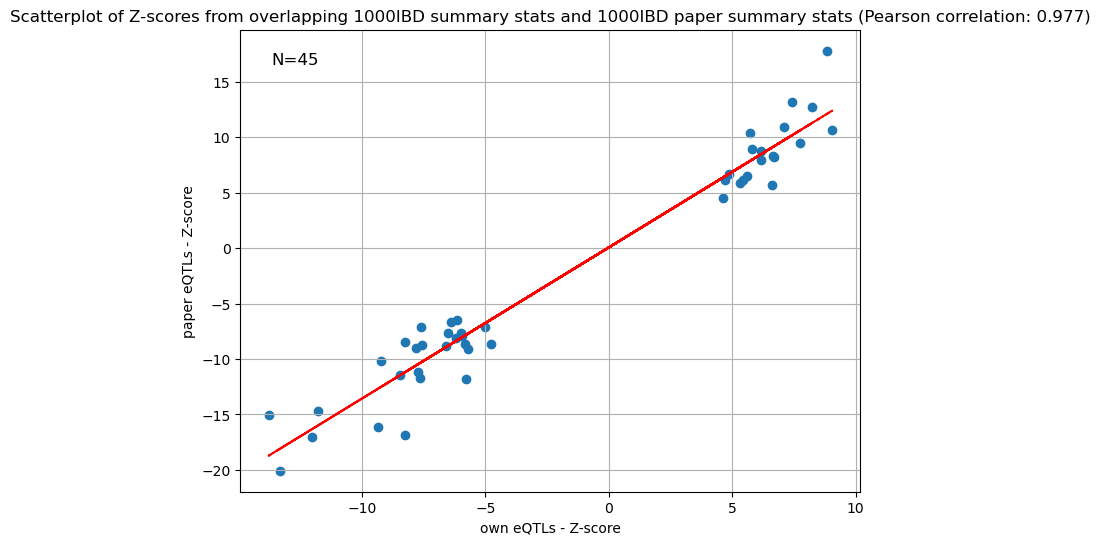

In [21]:
plt.figure(figsize=(8, 6), facecolor='white')

# Add trendline
z = np.polyfit(merged_df_overlap["MetaPZ"], merged_df_overlap["Z-score"], 1)  # Fit linear regression (1st-degree polynomial)
p = np.poly1d(z)
plt.plot(merged_df_overlap["MetaPZ"], p(merged_df_overlap["MetaPZ"]), "r--")  # Plot the trendline in red dashed style

plt.scatter(merged_df_overlap["MetaPZ"], merged_df_overlap["Z-score"], alpha=1)
plt.title("Scatterplot of Z-scores from overlapping 1000IBD summary stats and 1000IBD paper summary stats (Pearson correlation: 0.977)")
plt.xlabel("own eQTLs - Z-score")
plt.ylabel("paper eQTLs - Z-score")
plt.text(0.05, 0.95, f'N={merged_df_overlap["Gene"].size}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.grid()
plt.show()


In [55]:
top_1000IBD_own_1000IBD_all.loc[top_1000IBD_own_1000IBD_all['Flipped'] == True, 'MetaPZ'] *= -1

# Perform Pearson correlation
pearson_corr, pearson_pval = pearsonr(top_1000IBD_own_1000IBD_all['MetaPZ'], top_1000IBD_own_1000IBD_all['MetaPZ_chrom'])

# Perform Spearman correlation
spearman_corr, spearman_pval = spearmanr(top_1000IBD_own_1000IBD_all['MetaPZ'], top_1000IBD_own_1000IBD_all['MetaPZ_chrom'])

# Output the results
print(f"\nPearson correlation: {pearson_corr}, p-value: {pearson_pval}")
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_pval}")


Pearson correlation: 0.8120768076651877, p-value: 0.0
Spearman correlation: 0.8225631818715124, p-value: 0.0


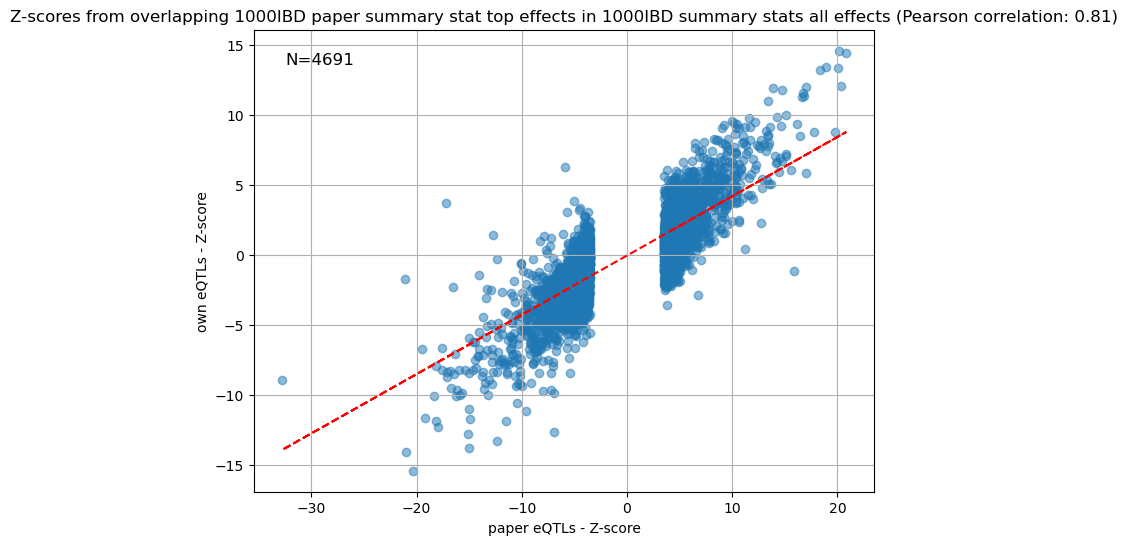

In [59]:
plt.figure(figsize=(8, 6), facecolor='white')

# Add trendline
z = np.polyfit(top_1000IBD_own_1000IBD_all["MetaPZ"], top_1000IBD_own_1000IBD_all["MetaPZ_chrom"], 1)  # Fit linear regression (1st-degree polynomial)
p = np.poly1d(z)
plt.plot(top_1000IBD_own_1000IBD_all["MetaPZ"], p(top_1000IBD_own_1000IBD_all["MetaPZ"]), "r--")  # Plot the trendline in red dashed style

plt.scatter(top_1000IBD_own_1000IBD_all["MetaPZ"], top_1000IBD_own_1000IBD_all["MetaPZ_chrom"], alpha=0.5)
plt.title("Z-scores from overlapping 1000IBD paper summary stat top effects in 1000IBD summary stats all effects (Pearson correlation: 0.81)")
plt.xlabel("paper eQTLs - Z-score")
plt.ylabel("own eQTLs - Z-score")
plt.text(0.05, 0.95, f'N={top_1000IBD_own_1000IBD_all["Gene"].size}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.grid()
plt.show()


In [145]:
# Step 1: Find common genes
common_genes = list(set(own_count['Gene']).intersection(set(paper_count['Gene'])))

# Step 2: Subset both dataframes to keep only the common genes
own_subset = own_count[own_count['Gene'].isin(common_genes)].set_index('Gene')
paper_subset = paper_count[paper_count['Gene'].isin(common_genes)].set_index('Gene')

# Ensure that the dataframes have the genes in the same order
own_subset = own_subset.loc[common_genes]
paper_subset = paper_subset.loc[common_genes]

# Step 3: Compute Pearson and Spearman correlations for each column
pearson_corr = {}
spearman_corr = {}

for column in own_subset.columns:
    pearson_corr[column] = pearsonr(own_subset[column], paper_subset[column])[0]
    spearman_corr[column] = spearmanr(own_subset[column], paper_subset[column])[0]

# Convert results to DataFrame for better readability
pearson_corr_df = pd.DataFrame.from_dict(pearson_corr, orient='index', columns=['Pearson'])
spearman_corr_df = pd.DataFrame.from_dict(spearman_corr, orient='index', columns=['Spearman'])

/tmp/ipykernel_1054559/2399447986.py:17: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr[column] = pearsonr(own_subset[column], paper_subset[column])[0]
/tmp/ipykernel_1054559/2399447986.py:18: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr[column] = spearmanr(own_subset[column], paper_subset[column])[0]


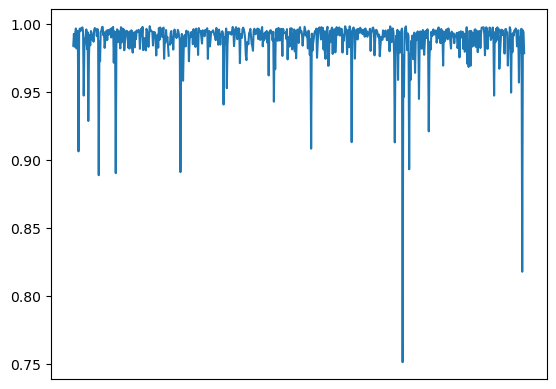

In [14]:
plt.plot(pearson_corr_df)
plt.xticks([])
plt.show()

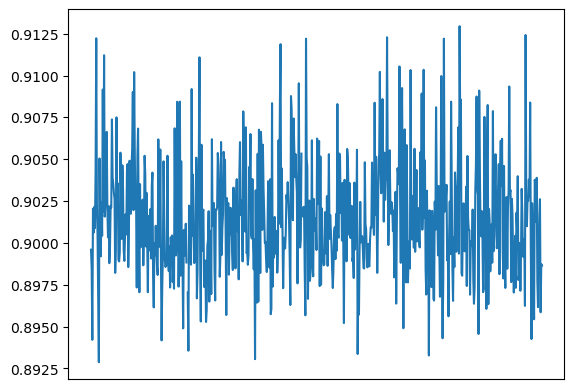

In [15]:
plt.plot(spearman_corr_df)
plt.xticks([])
plt.show()

In [26]:
pearson_corr_df.describe()

,Pearson
count,689.000000
mean,0.987740
std,0.017270
min,0.751026
25%,0.986523
50%,0.992372
75%,0.994700
max,0.998048


In [27]:
spearman_corr_df.describe()

,Spearman
count,689.000000
mean,0.901462
std,0.003410
min,0.892874
25%,0.899180
50%,0.901004
75%,0.903323
max,0.912945


In [28]:
# first two steps are the same as in the cell above
# Step 3: Transpose the dataframes for row-wise (gene-wise) correlation
own_subset = own_subset.T  # Transpose: now genes are columns
paper_subset = paper_subset.T  # Transpose: now genes are columns

# Step 4: Compute Pearson and Spearman correlations for each gene (which are now columns)
pearson_corr = {}
spearman_corr = {}

for gene in own_subset.columns:
    pearson_corr[gene] = pearsonr(own_subset[gene], paper_subset[gene])[0]
    spearman_corr[gene] = spearmanr(own_subset[gene], paper_subset[gene])[0]

# Convert results to DataFrame for better readability
pearson_row_wise_corr_df = pd.DataFrame.from_dict(pearson_corr, orient='index', columns=['Pearson'])
spearman_row_wise_corr_df = pd.DataFrame.from_dict(spearman_corr, orient='index', columns=['Spearman'])


/tmp/ipykernel_1820247/7101368.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr[gene] = pearsonr(own_subset[gene], paper_subset[gene])[0]
/tmp/ipykernel_1820247/7101368.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr[gene] = spearmanr(own_subset[gene], paper_subset[gene])[0]


In [29]:
pearson_row_wise_corr_df.describe()

,Pearson
count,42967.000000
mean,0.749529
std,0.264223
min,-0.331932
25%,0.653985
50%,0.823525
75%,0.958696
max,1.000000


In [30]:
spearman_row_wise_corr_df.describe()

,Spearman
count,42967.000000
mean,0.725088
std,0.260896
min,-0.309985
25%,0.624757
50%,0.770922
75%,0.953348
max,1.000000


## Confusion matrix

In [31]:
linkfile

,vcf_sample,exp_sample,dataset
0,214-1378,R103_B1289_1A,1000IBD
1,214-1453,R467_B_815_1B,1000IBD
2,214-1686,R161_B586_1,1000IBD
3,214-1405,R112_B1165_1A,1000IBD
4,214-1405,R8_B584_2,1000IBD
...,...,...,...
462,215-1610,R687_B_222_4,1000IBD
463,215-1739,R138_B828_2A,1000IBD
464,215-1739,R487_B_828_1A,1000IBD
465,216-3164,R422_B_431_2A,1000IBD


/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/users/umcg-priesebos/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/users/umcg-priesebos/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/users/umcg-priesebos/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/users/umcg-priesebos/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_1820247/1608675767.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is depre

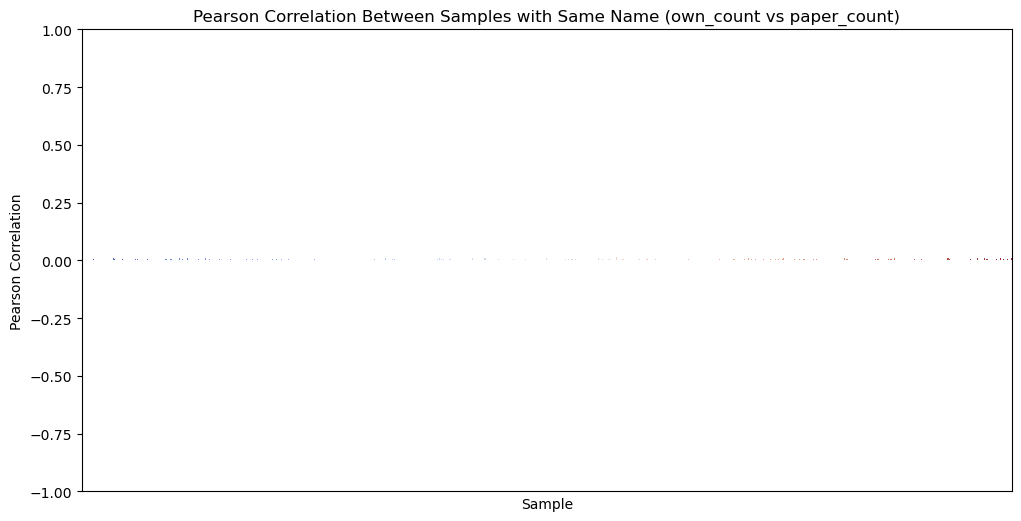

In [35]:
own_gene_ids = own_count.iloc[:, 0]
paper_gene_ids = paper_count.iloc[:, 0]
overlapping_genes = own_gene_ids[own_gene_ids.isin(paper_gene_ids)]

own_count_filtered = own_count[own_count.iloc[:, 0].isin(overlapping_genes)]
paper_count_filtered = paper_count[paper_count.iloc[:, 0].isin(overlapping_genes)]

own_count_filtered = own_count_filtered.sort_values(by=own_count_filtered.columns[0])
paper_count_filtered = paper_count_filtered.sort_values(by=paper_count_filtered.columns[0])

own_samples = own_count_filtered.iloc[:, 1:]  # Skip the first column (gene IDs)
paper_samples = paper_count_filtered.iloc[:, 1:]  # Skip the first column (gene IDs)

common_samples = own_samples.columns.intersection(paper_samples.columns)

correlations = []
for sample in common_samples:
    # Compute Pearson correlation for the same sample between own_samples and paper_samples
    corr_value = own_samples[sample].corr(paper_samples[sample])
    correlations.append(corr_value)

correlation_df = pd.DataFrame({'Sample': common_samples, 'Correlation': correlations})

plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='Correlation', data=correlation_df, palette="coolwarm")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Pearson Correlation Between Samples with Same Name (own_count vs paper_count)')
plt.ylabel('Pearson Correlation')
plt.xlabel('Sample')
plt.ylim(-1, 1)  # Pearson correlation ranges from -1 to 1
plt.xticks([])
plt.show()

/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/users/umcg-priesebos/miniforge3/lib/python3.12/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/users/umcg-priesebos/miniforge3/lib/python3.12/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/tmp/ipykernel_1820247/408439107.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sample', y='Spearman Correlation', data=spearman_correlation_df, palette="coolwarm")


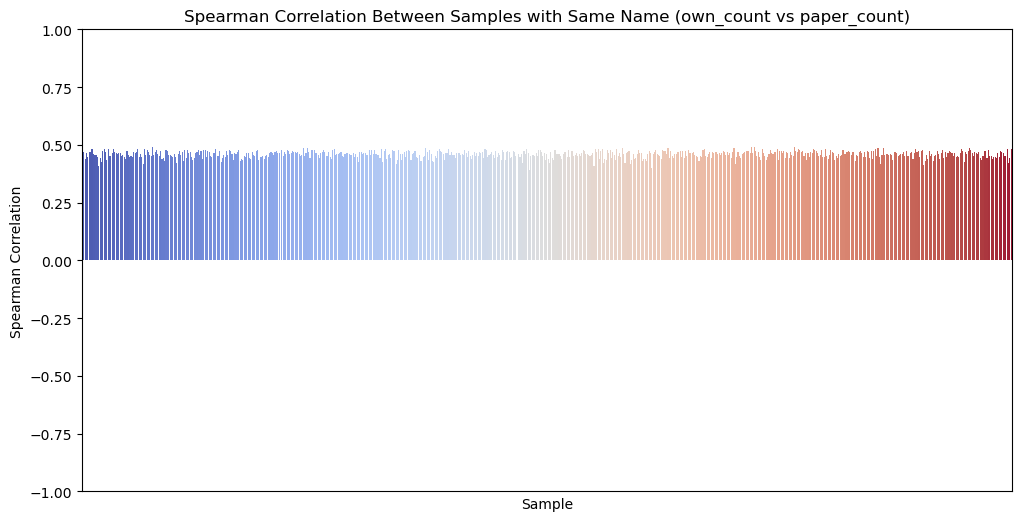

In [36]:
own_gene_ids = own_count.iloc[:, 0]
paper_gene_ids = paper_count.iloc[:, 0]
overlapping_genes = own_gene_ids[own_gene_ids.isin(paper_gene_ids)]

own_count_filtered = own_count[own_count.iloc[:, 0].isin(overlapping_genes)]
paper_count_filtered = paper_count[paper_count.iloc[:, 0].isin(overlapping_genes)]

own_count_filtered = own_count_filtered.sort_values(by=own_count_filtered.columns[0])
paper_count_filtered = paper_count_filtered.sort_values(by=paper_count_filtered.columns[0])

own_samples = own_count_filtered.iloc[:, 1:]  # Skip the first column (gene IDs)
paper_samples = paper_count_filtered.iloc[:, 1:]  # Skip the first column (gene IDs)

common_samples = own_samples.columns.intersection(paper_samples.columns)

spearman_correlations = []
for sample in common_samples:
    # Compute Spearman correlation for the same sample between own_samples and paper_samples
    corr_value = own_samples[sample].corr(paper_samples[sample], method='spearman')
    spearman_correlations.append(corr_value)

spearman_correlation_df = pd.DataFrame({'Sample': common_samples, 'Spearman Correlation': spearman_correlations})

plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='Spearman Correlation', data=spearman_correlation_df, palette="coolwarm")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Spearman Correlation Between Samples with Same Name (own_count vs paper_count)')
plt.ylabel('Spearman Correlation')
plt.xlabel('Sample')
plt.xticks([])
plt.ylim(-1, 1)  # Spearman correlation ranges from -1 to 1
plt.show()